In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score, accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization,UtilityFunction
from imblearn.metrics import geometric_mean_score
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_df = pd.read_csv("/content/drive/MyDrive/Machine Learning Lab/ML_1615.csv")
df = data_df.copy()
df.head(2)

,department_SET,department_ASL,department_BAE,session,university_category_Public,university_category_Private,father_occupation_Businessman,father_occupation_Teacher,father_occupation_Others,father_occupation_Service Holder,...,genre_Poetry,genre_NO,genre_Other,smoke,critical_health_issues,emotional_ctrl_mental_health,SSC,HSC,CGPA,CGPA_cat
0,0,0,1,4,0,1,0,0,0,0,...,0,0,0,5,0,1,4.82,4.83,3.70,High
1,1,0,0,4,1,0,0,1,0,0,...,0,0,1,5,1,1,5.00,5.00,3.69,High


In [ ]:
columns_to_drop = ['CGPA','CGPA_cat','genre_NO','genre_Other','father_occupation_Others','mother_occupation_Others','father_educational_qualification_Others',
                   'mother_educational_qualification_Others','genre_Religious', 'genre_Educational', 'genre_Comics', 'genre_Poetry','family_members_cnt','session']
X_df = df.drop(columns_to_drop, axis = 1)
y = df['CGPA_cat']

In [ ]:
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features

    return df

In [ ]:
columns = ['study_duration_day','freq_undrst_core_concept','freq_undrst_class_lecture','final_exam_prep','test_satisfaction','class_performance',
             'attendance','sleep_duration_day','socializing_freq','freq_exercise', 'freq_extra-curricular_activity','freq_religious_practices', 'spent_sports',
             'spent_social_media','spent_online_games', 'leadership_skill','smoke','SSC', 'HSC']

X_df = Standard_Scaler (X_df, columns)

In [ ]:
rf = RandomForestClassifier(n_estimators=350,random_state=42)
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df, y,stratify=y, test_size=0.25, random_state=42, shuffle=True)

rf.fit(X_df_train, y_df_train)

RandomForestClassifier(n_estimators=350, random_state=42)

[('genre_Non-fiction', 9.845969760380964e-05), ('genre_Science Fiction', 0.00012855138691528662), ('genre_Self-help', 0.0001448009542165361), ('genre_Adventure', 0.00018622026947612985), ('genre_Literature', 0.0002353951745150694), ('genre_Thriller', 0.0004317581351751884), ('genre_Historical', 0.0011296318767072002), ('genre_Romantic', 0.001285718609437291), ('father_occupation_Govt. Service Holder', 0.0019398953641583821), ('father_occupation_Doctor', 0.0019449226461576775), ('study_place_Library', 0.002029486939116615), ('mother_occupation_Doctor', 0.002192326317404574), ('sleep_time_intervals_6 pm - 12 am', 0.0022944263090884554), ('source_income_Job', 0.002523763488010744), ('father_occupation_Engineer', 0.002994471351702343), ('monthly_family_income_more than 100k', 0.0030021775070453094), ('university_category_Public', 0.003891809661155224), ('university_category_Private', 0.0041973199528556205), ('mother_occupation_Service holder', 0.0042318173710753065), ('department_BAE', 0.0

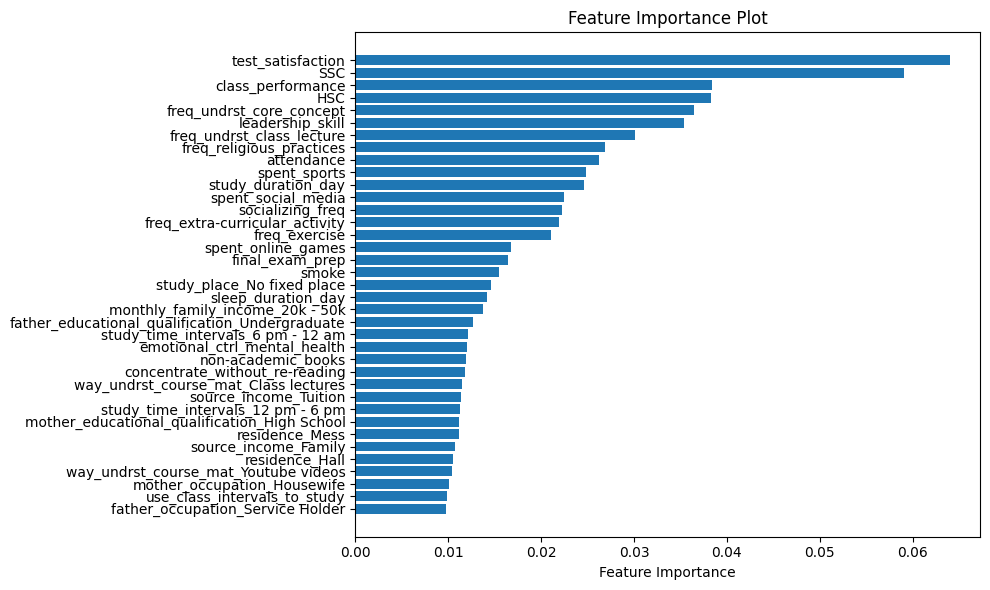

In [ ]:
sort = rf.feature_importances_.argsort()

xx = []
yy = []
to_drop = []

for i in sort:
    if rf.feature_importances_[i] < 0.0095:
        to_drop.append((list(X_df.columns)[i], rf.feature_importances_[i]))
    else:
        xx.append( list(X_df.columns)[i] )
        yy.append( rf.feature_importances_[i] )

print(to_drop)

# Print features to drop and their importance values
print("Features to drop (importance < 0.0095):")
for feature, importance in to_drop:
    print(f"{feature}: {importance}")

# Print the selected features and their importance values
print("\nSelected features and their importance values:")
for feature, importance in zip(xx, yy):
    print(f"{feature}: {importance}")

plt.figure(figsize=(10, 6))
# plt.barh(np.array(list(data.columns))[sort], int(rf.feature_importances_[sort]*100))
plt.barh(xx,yy)
plt.xlabel("Feature Importance")

plt.title("Feature Importance Plot")
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Extract only the feature names from to_drop
to_drop_names = [feature for feature, _ in to_drop]

# Drop the features from X
df = X_df.drop(columns=to_drop_names)
df['CGPA_cat'] = data_df['CGPA_cat']

print(df.shape)
print(df.columns)

(1615, 38)
Index(['father_occupation_Service Holder', 'mother_occupation_Housewife',
       'father_educational_qualification_Undergraduate',
       'mother_educational_qualification_High School', 'residence_Mess',
       'residence_Hall', 'source_income_Family', 'source_income_Tuition',
       'monthly_family_income_20k - 50k', 'study_duration_day',
       'study_time_intervals_12 pm - 6 pm',
       'study_time_intervals_6 pm - 12 am', 'study_place_No fixed place',
       'use_class_intervals_to_study', 'freq_undrst_core_concept',
       'way_undrst_course_mat_Youtube videos',
       'way_undrst_course_mat_Class lectures', 'freq_undrst_class_lecture',
       'concentrate_without_re-reading', 'final_exam_prep',
       'test_satisfaction', 'class_performance', 'attendance',
       'sleep_duration_day', 'socializing_freq', 'freq_exercise',
       'freq_extra-curricular_activity', 'freq_religious_practices',
       'spent_sports', 'spent_social_media', 'spent_online_games',
       'leader

In [ ]:
X_df = df.drop('CGPA_cat', axis = 1)
y_df = df['CGPA_cat']

X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df, y_df,stratify=y_df, test_size=0.30, random_state=42, shuffle=True)

rf.fit(X_df_train, y_df_train)
y_df_pred = rf.predict(X_df_test)
print(classification_report(y_df_test, y_df_pred))
print("f1 score: ",f1_score(y_df_test, y_df_pred,average='weighted'))
y_df_pred_proba = rf.predict_proba(X_df_test)
print("roc_auc score: ",roc_auc_score(y_df_test,y_df_pred_proba, average='weighted', multi_class='ovr'))

              precision    recall  f1-score   support

        High       0.94      1.00      0.97       448
         Low       0.50      0.38      0.43         8
      Medium       0.50      0.07      0.12        29

    accuracy                           0.93       485
   macro avg       0.65      0.48      0.51       485
weighted avg       0.91      0.93      0.91       485

f1 score:  0.9070044035631375
roc_auc score:  0.8756931145920845


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df,stratify=y_df, test_size=0.25, random_state=42, shuffle=True)

In [ ]:
X_train_org = X_train
y_train_org = y_train

## No tuning

In [ ]:
# X_train = X_train_org
# y_train = y_train_org

# classifiers_hp = {
#     'RF': RandomForestClassifier(random_state=42,n_jobs=-1),
#     'SVC': SVC(random_state=42,probability=True),
#     'KNN': KNN(n_neighbors=5),
#     'DT': DecisionTreeClassifier(random_state=42),
#     'Ada': AdaBoostClassifier(random_state=42,algorithm='SAMME.R'),
#     'XGBoost': XGBClassifier(random_state=42,n_jobs=-1),
#     'LR': LogisticRegression(class_weight='balanced',random_state=42,n_jobs=-1),
#     'MLP': MLPClassifier(solver='adam',shuffle=True,hidden_layer_sizes=(100,100,200,100,100))

# }

# data = []
# class_names = ['High', 'Low', 'Medium']


# for name, clf in classifiers_hp.items():

#     if name == "XGBoost":
#       le = LabelEncoder()
#       y_train_xgb = le.fit_transform(y_train)
#       y_test_xgb = le.transform(y_test)



#     if name == "XGBoost":
#       y_train_hp = y_train_xgb
#       y_test_hp = y_test_xgb
#     else:
#       y_train_hp = y_train
#       y_test_hp = y_test



#     clf.fit( X_train, y_train_hp )
#     y_pred_od_hp = clf.predict(X_test)

#     print("\nmodel: ",name)
#     print("Classification report: ")
#     print( classification_report(y_test_hp, y_pred_od_hp) )



#     accuracy = accuracy_score( y_test_hp, y_pred_od_hp )
#     precision_weighted = precision_score(y_test_hp, y_pred_od_hp,average='weighted')
#     recall_weighted = recall_score(y_test_hp, y_pred_od_hp,average='weighted')
#     f1_weighted = f1_score( y_test_hp, y_pred_od_hp, average="weighted" )

#     y_test_prob_hp = clf.predict_proba(X_test)
#     roc_auc = roc_auc_score(y_test_hp, y_test_prob_hp,multi_class='ovr',average='weighted')

#     data.append( [ name, accuracy, precision_weighted, recall_weighted, f1_weighted,roc_auc ] )

#     cm = confusion_matrix(y_test_hp, y_pred_od_hp)
#     print("Confusion Matrix:")
#     print(cm)
#     plt.figure(figsize=(4, 3))
#     sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 10}, cmap='Blues',
#                 xticklabels=class_names, yticklabels=class_names)
#     plt.title(f'Confusion Matrix for {name}', fontsize=12)
#     plt.ylabel('Actual', fontsize=12)
#     plt.xlabel('Predicted', fontsize=12)
#     plt.xticks(fontsize=10)
#     plt.yticks(fontsize=10)
#     plt.show()

# performance_metric_scores_df = pd.DataFrame(data, columns=['classifier', 'accuracy', 'precision','recall', 'f1','roc_auc_score'])
# print("\nOriginal Data:")
# performance_metric_scores_df.sort_values(by = ['f1','roc_auc_score'],ascending=False)

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.preprocessing import label_binarize
# from itertools import cycle
# import numpy as np
# from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# # Assuming you have the following variables defined:
# # X_train, X_test, y_train, y_test
# # classifiers_hp - your dictionary of classifiers

# # Binarize the output labels for multi-class ROC computation
# classes = np.unique(y_train)
# n_classes = len(classes)
# y_test_binarized = label_binarize(y_test, classes=classes)
# y_train_binarized = label_binarize(y_train, classes=classes)

# # Create a figure for plotting
# plt.figure(figsize=(6, 4))

# # Colors for plotting
# colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink'])

# for (name, clf), color in zip(classifiers_hp.items(), colors):
#     # Encode labels for XGBoost
#     if "XGBoost" in name:
#         le = LabelEncoder()
#         y_train_encoded = le.fit_transform(y_train)  # Encode y_train
#         y_test_encoded = le.transform(y_test)  # Encode y_test
#         clf.fit(X_train, y_train_encoded)  # Fit with encoded labels
#     else:
#         clf.fit(X_train, y_train)  # Fit other classifiers normally

#     # Get predicted probabilities or decision scores
#     if hasattr(clf, "predict_proba"):
#         y_score = clf.predict_proba(X_test)
#     elif hasattr(clf, "decision_function"):
#         y_score = clf.decision_function(X_test)
#         # For binary classification, reshape if necessary
#         if len(y_score.shape) == 1:
#             y_score = y_score.reshape(-1, 1)
#     else:
#         continue  # Skip classifiers without probability scores

#     # Compute ROC curve and ROC area for each class
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()

#     # Always use binarized labels for roc_curve
#     y_test_roc = y_test_binarized

#     if n_classes > 2:
#         for i in range(n_classes):
#             fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
#             roc_auc[i] = auc(fpr[i], tpr[i])
#         # Compute weighted-average ROC curve and ROC area
#         fpr["weighted"], tpr["weighted"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
#         # roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])
#         roc_auc["weighted"] = roc_auc_score(y_test_roc, y_score,multi_class='ovr',average='weighted')
#         # Plot weighted-average ROC curve
#         plt.plot(fpr["weighted"], tpr["weighted"],
#                  label='{0} (area = {1:0.2f})'
#                        ''.format(name, roc_auc["weighted"]),
#                  color=color, linewidth=2)
#     else:
#         fpr[0], tpr[0], _ = roc_curve(y_test_binarized.ravel(), y_score[:, 1])
#         roc_auc[0] = auc(fpr[0], tpr[0])
#         # Plot ROC curve for binary classification
#         plt.plot(fpr[0], tpr[0],
#                  label='{0} (area = {1:0.2f})'
#                        ''.format(name, roc_auc[0]),
#                  color=color, linewidth=2)


# # Plot the diagonal line representing no skill
# plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

# # Customize the plot
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves for Different Classifiers')
# plt.legend(loc="lower right")
# plt.grid(True)
# plt.show()


## Tuning

In [ ]:
# X_train = X_train_org
# y_train = y_train_org

# classifiers_hp = {

#     'RF': RandomForestClassifier(max_depth=8, max_features=0.999,min_samples_leaf=5, min_samples_split=4,n_estimators=150, random_state=42,n_jobs=-1),
#     'SVC': SVC(C=800.5, coef0=0.85, gamma=0.05,probability=True, random_state=42),
#     'KNN': KNN(leaf_size=218, n_neighbors=4, p=86),
#     'DT': DecisionTreeClassifier(max_depth=5, random_state=42),
#     'Ada': AdaBoostClassifier(random_state=42,algorithm='SAMME.R',learning_rate=0.04251, n_estimators=319),
#     'XGBoost': XGBClassifier(random_state=42,n_jobs=-1,max_depth=6,learning_rate=0.958,min_child_weight=1.56,n_estimators=300),
#     'LR': LogisticRegression(class_weight='balanced',C=60.5, intercept_scaling=71.1,max_iter=250, random_state=42, tol=9.6991,n_jobs=-1),
#     'MLP': MLPClassifier(hidden_layer_sizes=(100,200,200,100,100),solver='adam',shuffle=True,  random_state=42)
# }

# data = []


# for name, clf in classifiers_hp.items():

#     if name == "XGBoost":
#       le = LabelEncoder()
#       y_train_xgb = le.fit_transform(y_train)
#       y_test_xgb = le.transform(y_test)



#     if name == "XGBoost":
#       y_train_hp = y_train_xgb
#       y_test_hp = y_test_xgb
#     else:
#       y_train_hp = y_train
#       y_test_hp = y_test



#     clf.fit( X_train, y_train_hp )
#     y_pred_od_hp = clf.predict(X_test)

#     print("\nmodel: ",name)
#     print("Classification report: ")
#     print( classification_report(y_test_hp, y_pred_od_hp) )



#     accuracy = accuracy_score( y_test_hp, y_pred_od_hp )
#     precision_weighted = precision_score(y_test_hp, y_pred_od_hp,average='weighted')
#     recall_weighted = recall_score(y_test_hp, y_pred_od_hp,average='weighted')
#     f1_weighted = f1_score( y_test_hp, y_pred_od_hp, average="weighted" )

#     y_test_prob_hp = clf.predict_proba(X_test)
#     roc_auc = roc_auc_score(y_test_hp, y_test_prob_hp,multi_class='ovr',average='weighted')

#     data.append( [ name, accuracy, precision_weighted, recall_weighted, f1_weighted,roc_auc ] )

#     cm = confusion_matrix(y_test_hp, y_pred_od_hp)
#     print("Confusion Matrix:")
#     print(cm)

# performance_metric_scores_df = pd.DataFrame(data, columns=['classifier', 'accuracy', 'precision','recall', 'f1','roc_auc_score'])
# print("\nOriginal Data+ Tuned")
# performance_metric_scores_df.sort_values(by=['f1','roc_auc_score'], ascending=False)

## RandomOverSampling + Tuning


model:  MLP
Classification report: 
              precision    recall  f1-score   support

        High       0.97      0.98      0.97       373
         Low       0.33      0.17      0.22         6
      Medium       0.57      0.48      0.52        25

    accuracy                           0.94       404
   macro avg       0.62      0.54      0.57       404
weighted avg       0.93      0.94      0.94       404

Confusion Matrix:
[[367   1   5]
 [  1   1   4]
 [ 12   1  12]]


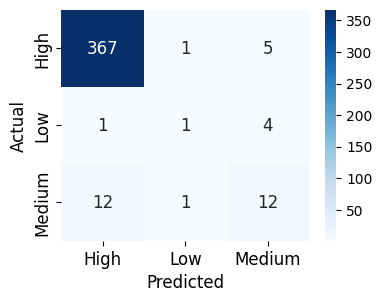


RandomSampling + Tuned


,classifier,accuracy,precision,recall,f1,roc_auc_score
0,MLP,0.940594,0.931993,0.940594,0.935557,0.896784


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train_org, y_train_org)
X_train = X_over
y_train = y_over

classifiers_hp = {
    # 'RF': RandomForestClassifier( max_depth=8, max_features=0.1,min_samples_split=4, n_estimators=334, random_state=42),
    # 'SVC': SVC(C=374.60266483547775, coef0=0.9507192349792751, gamma=0.7320207424172239,probability=True, random_state=42),
    # 'KNN': KNN(leaf_size=163, n_neighbors=5, p=1),
    # 'DT': DecisionTreeClassifier(max_depth=7, random_state=42),
    # 'Ada': AdaBoostClassifier(random_state=42,algorithm='SAMME.R',learning_rate=0.045, n_estimators=319), ## Adaboost is a weak learner
    # 'XGBoost': XGBClassifier(random_state=42,n_jobs=-1,colsample_bytree=1.0,learning_rate=1.1,max_depth=8,min_child_weight=1.56,n_estimators=250),
    # 'LR': LogisticRegression(class_weight='balanced',C=25.83546245814244, intercept_scaling=53.8,max_iter=224, random_state=42, tol=2.2152560878543395,n_jobs=-1),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,200,100,100,200,100,100),solver='adam',learning_rate='adaptive',random_state=42)
}

data = []
class_names = ['High', 'Low', 'Medium']


for name, clf in classifiers_hp.items():

    if name == "XGBoost":
      le = LabelEncoder()
      y_train_xgb = le.fit_transform(y_train)
      y_test_xgb = le.transform(y_test)



    if name == "XGBoost":
      y_train_hp = y_train_xgb
      y_test_hp = y_test_xgb
    else:
      y_train_hp = y_train
      y_test_hp = y_test


    clf.fit( X_train, y_train_hp )

    y_pred_od_hp = clf.predict(X_test)

    print("\nmodel: ",name)
    print("Classification report: ")
    print( classification_report(y_test_hp, y_pred_od_hp) )



    accuracy = accuracy_score( y_test_hp, y_pred_od_hp )
    precision_weighted = precision_score(y_test_hp, y_pred_od_hp,average='weighted')
    recall_weighted = recall_score(y_test_hp, y_pred_od_hp,average='weighted')
    f1_weighted = f1_score( y_test_hp, y_pred_od_hp, average="weighted" )

    y_test_prob_hp = clf.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test_hp, y_test_prob_hp,multi_class='ovr',average='weighted')

    data.append( [ name, accuracy, precision_weighted, recall_weighted, f1_weighted,roc_auc ] )

    cm = confusion_matrix(y_test_hp, y_pred_od_hp)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    # plt.title(f'Confusion Matrix for {name}', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

performance_metric_scores_df = pd.DataFrame(data, columns=['classifier', 'accuracy', 'precision','recall', 'f1','roc_auc_score'])
print("\nRandomSampling + Tuned")
performance_metric_scores_df.sort_values(by=['f1','roc_auc_score'], ascending=False)

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.preprocessing import label_binarize
# from itertools import cycle
# import numpy as np
# from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# # Assuming you have the following variables defined:
# # X_train, X_test, y_train, y_test
# # classifiers_hp - your dictionary of classifiers

# # Binarize the output labels for multi-class ROC computation
# classes = np.unique(y_train)
# n_classes = len(classes)
# y_test_binarized = label_binarize(y_test, classes=classes)
# y_train_binarized = label_binarize(y_train, classes=classes)

# # Create a figure for plotting
# plt.figure(figsize=(6, 4))

# # Colors for plotting
# colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink'])

# for (name, clf), color in zip(classifiers_hp.items(), colors):
#     # Encode labels for XGBoost
#     if "XGBoost" in name:
#         le = LabelEncoder()
#         y_train_encoded = le.fit_transform(y_train)  # Encode y_train
#         y_test_encoded = le.transform(y_test)  # Encode y_test
#         clf.fit(X_train, y_train_encoded)  # Fit with encoded labels
#     else:
#         clf.fit(X_train, y_train)  # Fit other classifiers normally

#     # Get predicted probabilities or decision scores
#     if hasattr(clf, "predict_proba"):
#         y_score = clf.predict_proba(X_test)
#     elif hasattr(clf, "decision_function"):
#         y_score = clf.decision_function(X_test)
#         # For binary classification, reshape if necessary
#         if len(y_score.shape) == 1:
#             y_score = y_score.reshape(-1, 1)
#     else:
#         continue  # Skip classifiers without probability scores

#     # Compute ROC curve and ROC area for each class
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()

#     # Always use binarized labels for roc_curve
#     y_test_roc = y_test_binarized

#     if n_classes > 2:
#         for i in range(n_classes):
#             fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
#             roc_auc[i] = auc(fpr[i], tpr[i])
#         # Compute weighted-average ROC curve and ROC area
#         fpr["weighted"], tpr["weighted"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
#         # roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])
#         roc_auc["weighted"] = roc_auc_score(y_test_roc, y_score,multi_class='ovr',average='weighted')
#         # Plot weighted-average ROC curve
#         plt.plot(fpr["weighted"], tpr["weighted"],
#                  label='{0} (area = {1:0.2f})'
#                        ''.format(name, roc_auc["weighted"]),
#                  color=color, linewidth=2)
#     else:
#         fpr[0], tpr[0], _ = roc_curve(y_test_binarized.ravel(), y_score[:, 1])
#         roc_auc[0] = auc(fpr[0], tpr[0])
#         # Plot ROC curve for binary classification
#         plt.plot(fpr[0], tpr[0],
#                  label='{0} (area = {1:0.2f})'
#                        ''.format(name, roc_auc[0]),
#                  color=color, linewidth=2)


# # Plot the diagonal line representing no skill
# plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

# # Customize the plot
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves for Different Classifiers')
# plt.legend(loc="lower right")
# plt.grid(True)
# plt.show()


## Smote + Tuning


model:  RF
Classification report: 
              precision    recall  f1-score   support

        High       0.96      0.98      0.97       373
         Low       0.50      0.67      0.57         6
      Medium       0.60      0.36      0.45        25

    accuracy                           0.94       404
   macro avg       0.69      0.67      0.66       404
weighted avg       0.93      0.94      0.93       404

Confusion Matrix:
[[366   1   6]
 [  2   4   0]
 [ 13   3   9]]


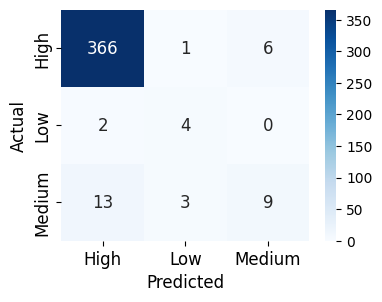


model:  XGBoost
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       373
           1       0.62      0.83      0.71         6
           2       0.44      0.44      0.44        25

    accuracy                           0.93       404
   macro avg       0.68      0.74      0.71       404
weighted avg       0.93      0.93      0.93       404

Confusion Matrix:
[[358   1  14]
 [  1   5   0]
 [ 12   2  11]]


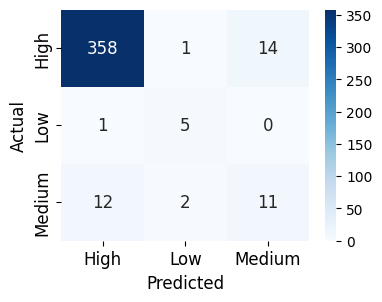


Smote + Tuned


,classifier,accuracy,precision,recall,f1,roc_auc_score
0,RF,0.938119,0.931473,0.938119,0.932662,0.897719
1,XGBoost,0.925743,0.927426,0.925743,0.926357,0.868333


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_org, y_train_org)
X_train = X_smote
y_train = y_smote

classifiers_smote = {
    'RF': RandomForestClassifier(random_state=42,criterion ='entropy', max_depth=8, n_estimators= 400,min_samples_split=5,min_samples_leaf=4,
                                 max_features='sqrt',n_jobs=-1),
    # 'SVC': SVC(C=90, coef0=0.42529357495876574, gamma=0.2859,probability=True, random_state=42),
    # 'KNN': KNN(leaf_size=57, n_neighbors=4, p=1),
    # 'DT': DecisionTreeClassifier(max_depth=7,min_weight_fraction_leaf=0.03,min_samples_split=3,min_samples_leaf=4,random_state=42),
    # 'Ada': AdaBoostClassifier(random_state=42,algorithm='SAMME',learning_rate=0.29809801213116555, n_estimators=279),
    'XGBoost': XGBClassifier(learning_rate=1.0,max_depth=20,n_estimators=359,reg_alpha=25,random_state=42,n_jobs=-1),
    # 'LR': LogisticRegression(class_weight='balanced',random_state=42,C=54.51222264639497, intercept_scaling=50.60706717116675,max_iter=241,n_jobs=-1),
    # 'MLP': MLPClassifier(hidden_layer_sizes=(100,200,100,100,200,100,100),solver='sgd',shuffle=True,random_state=42)
}

data = []
class_names = ['High', 'Low', 'Medium']


for name, clf in classifiers_smote.items():

    if name == "XGBoost":
      le = LabelEncoder()
      y_train_xgb = le.fit_transform(y_train)
      y_test_xgb = le.transform(y_test)



    if name == "XGBoost":
      y_train_hp = y_train_xgb
      y_test_hp = y_test_xgb
    else:
      y_train_hp = y_train
      y_test_hp = y_test


    clf.fit( X_train, y_train_hp )

    y_pred_od_hp = clf.predict(X_test)

    print("\nmodel: ",name)
    print("Classification report: ")
    print( classification_report(y_test_hp, y_pred_od_hp) )



    accuracy = accuracy_score( y_test_hp, y_pred_od_hp )
    precision_weighted = precision_score(y_test_hp, y_pred_od_hp,average='weighted')
    recall_weighted = recall_score(y_test_hp, y_pred_od_hp,average='weighted')
    f1_weighted = f1_score( y_test_hp, y_pred_od_hp, average="weighted" )

    y_test_prob_hp = clf.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test_hp, y_test_prob_hp,multi_class='ovr',average='weighted')

    data.append( [ name, accuracy, precision_weighted, recall_weighted, f1_weighted,roc_auc ] )

    cm = confusion_matrix(y_test_hp, y_pred_od_hp)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    # plt.title(f'Confusion Matrix for {name}', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

performance_metric_scores_df = pd.DataFrame(data, columns=['classifier', 'accuracy', 'precision','recall', 'f1','roc_auc_score'])
print("\nSmote + Tuned")
performance_metric_scores_df.sort_values(by=['f1','roc_auc_score'], ascending=False)

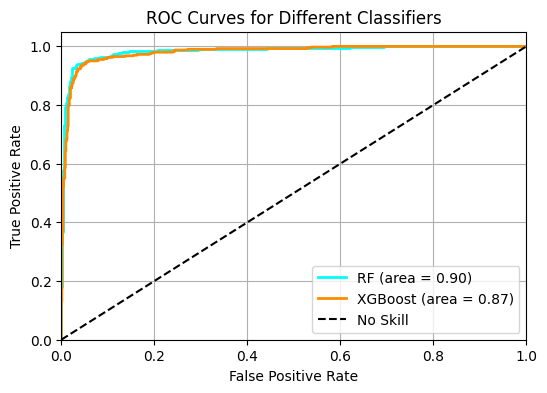

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming you have the following variables defined:
# X_train, X_test, y_train, y_test
# classifiers_hp - your dictionary of classifiers

# Binarize the output labels for multi-class ROC computation
classes = np.unique(y_train)
n_classes = len(classes)
y_test_binarized = label_binarize(y_test, classes=classes)
y_train_binarized = label_binarize(y_train, classes=classes)

# Create a figure for plotting
plt.figure(figsize=(6, 4))

# Colors for plotting
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink'])

for (name, clf), color in zip(classifiers_smote.items(), colors):
    # Encode labels for XGBoost
    if "XGBoost" in name:
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)  # Encode y_train
        y_test_encoded = le.transform(y_test)  # Encode y_test
        clf.fit(X_train, y_train_encoded)  # Fit with encoded labels
    else:
        clf.fit(X_train, y_train)  # Fit other classifiers normally

    # Get predicted probabilities or decision scores
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    elif hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)
        # For binary classification, reshape if necessary
        if len(y_score.shape) == 1:
            y_score = y_score.reshape(-1, 1)
    else:
        continue  # Skip classifiers without probability scores

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Always use binarized labels for roc_curve
    y_test_roc = y_test_binarized

    if n_classes > 2:
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute weighted-average ROC curve and ROC area
        fpr["weighted"], tpr["weighted"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
        # roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])
        roc_auc["weighted"] = roc_auc_score(y_test_roc, y_score,multi_class='ovr',average='weighted')
        # Plot weighted-average ROC curve
        plt.plot(fpr["weighted"], tpr["weighted"],
                 label='{0} (area = {1:0.2f})'
                       ''.format(name, roc_auc["weighted"]),
                 color=color, linewidth=2)
    else:
        fpr[0], tpr[0], _ = roc_curve(y_test_binarized.ravel(), y_score[:, 1])
        roc_auc[0] = auc(fpr[0], tpr[0])
        # Plot ROC curve for binary classification
        plt.plot(fpr[0], tpr[0],
                 label='{0} (area = {1:0.2f})'
                       ''.format(name, roc_auc[0]),
                 color=color, linewidth=2)


# Plot the diagonal line representing no skill
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Smote + Tomek Link

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

X_smote_tomek,y_smote_tomek = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'),random_state=42).fit_resample(X_train_org, y_train_org)
X_train = X_smote_tomek
y_train = y_smote_tomek

classifiers_hp = {
    'RF': RandomForestClassifier(random_state=42,criterion ='entropy', max_depth=8, n_estimators= 400,min_samples_split=5,min_samples_leaf=4,
                                 max_features='sqrt',n_jobs=-1),
    'SVC': SVC(C=490, coef0=0.42529357495876574, gamma=0.24728057342116827,probability=True, random_state=42),
    'KNN': KNN(leaf_size=180, n_neighbors=4, p=1),
    'DT': DecisionTreeClassifier(max_depth=19,min_weight_fraction_leaf=0.01, random_state=42),
    'Ada': AdaBoostClassifier(random_state=42,algorithm='SAMME',learning_rate=0.5, n_estimators=279),
    'XGBoost': XGBClassifier(learning_rate=1.0,max_depth=20,n_estimators=359,reg_alpha=25,random_state=42,n_jobs=-1),
    'LR': LogisticRegression(random_state=42,n_jobs=-1),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,200,100,100,200,100,100),solver='sgd',shuffle=True,random_state=42)
}

data = []


for name, clf in classifiers_hp.items():

    if name == "XGBoost":
      le = LabelEncoder()
      y_train_xgb = le.fit_transform(y_train)
      y_test_xgb = le.transform(y_test)



    if name == "XGBoost":
      y_train_hp = y_train_xgb
      y_test_hp = y_test_xgb
    else:
      y_train_hp = y_train
      y_test_hp = y_test


    clf.fit( X_train, y_train_hp )

    y_pred_od_hp = clf.predict(X_test)

    print("\nmodel: ",name)
    print("Classification report: ")
    print( classification_report(y_test_hp, y_pred_od_hp) )



    accuracy = accuracy_score( y_test_hp, y_pred_od_hp )
    precision_weighted = precision_score(y_test_hp, y_pred_od_hp,average='weighted')
    recall_weighted = recall_score(y_test_hp, y_pred_od_hp,average='weighted')
    f1_weighted = f1_score( y_test_hp, y_pred_od_hp, average="weighted" )

    y_test_prob_hp = clf.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test_hp, y_test_prob_hp,multi_class='ovr',average='weighted')

    cm = confusion_matrix(y_test_hp, y_pred_od_hp)
    print("Confusion Matrix:")
    print(cm)

    data.append( [ name, accuracy, precision_weighted, recall_weighted, f1_weighted,roc_auc ] )


performance_metric_scores_df = pd.DataFrame(data, columns=['classifier', 'accuracy', 'precision','recall', 'f1','roc_auc_score'])
print("\nSmote + Tomek Link + Tuned")
performance_metric_scores_df.sort_values(by=['f1','roc_auc_score'], ascending=False)


model:  RF
Classification report: 
              precision    recall  f1-score   support

        High       0.96      0.98      0.97       373
         Low       0.50      0.67      0.57         6
      Medium       0.60      0.36      0.45        25

    accuracy                           0.94       404
   macro avg       0.69      0.67      0.66       404
weighted avg       0.93      0.94      0.93       404

Confusion Matrix:
[[366   1   6]
 [  2   4   0]
 [ 13   3   9]]

model:  SVC
Classification report: 
              precision    recall  f1-score   support

        High       0.93      0.99      0.96       373
         Low       0.00      0.00      0.00         6
      Medium       0.67      0.08      0.14        25

    accuracy                           0.92       404
   macro avg       0.53      0.36      0.37       404
weighted avg       0.90      0.92      0.90       404

Confusion Matrix:
[[371   1   1]
 [  6   0   0]
 [ 23   0   2]]

model:  KNN
Classification report: 


,classifier,accuracy,precision,recall,f1,roc_auc_score
0,RF,0.938119,0.931473,0.938119,0.932662,0.897719
5,XGBoost,0.925743,0.927426,0.925743,0.926357,0.868333
7,MLP,0.923267,0.918510,0.923267,0.920739,0.879260
4,Ada,0.888614,0.918007,0.888614,0.901097,0.804537
1,SVC,0.923267,0.897585,0.923267,0.895081,0.803756
2,KNN,0.836634,0.900454,0.836634,0.863610,0.787538
3,DT,0.834158,0.891787,0.834158,0.859697,0.774090
6,LR,0.811881,0.894220,0.811881,0.846619,0.791367
